In [ ]:
import sys
from pathlib import Path
import numpy as np 
import pandas as pd
import joblib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_score,  train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, median_absolute_error

In [ ]:
PROJPATH = Path().resolve().parent
sys.path.append((PROJPATH / 'scripts').as_posix())
import riverice_util as ru

ML_LOC = PROJPATH / "data/ML_2024"

#### Let's start with Nenana (or another location)

In [ ]:
location = "Tanana River at Nenana"
df = pd.read_csv(ML_LOC / f"DF/DF_{location.replace(' ', '_')}", index_col=0)
Xy = df.loc[1980:2023, :].dropna()
# Xy.reset_index(inplace=True, names='year')
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]
X_2024 = df.iloc[-1, :-1]
# X_2024 = df.reset_index(names='year').iloc[-1, :-1]

#### Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import f_regression
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:

clf = ExtraTreesRegressor(n_estimators=200)
clf = clf.fit(X, y)
clf.feature_importances_
selector = SelectFromModel(clf, prefit=True)
X_new = X[X.columns[selector.get_support()]]
X_new

,AO_DJ,AO_FM,SOI_FM,Nino3.4_DJ,Nino3.4_FM,NAO_FM,EA_FM,EA-WR_DJ,SCA_FM,POL_DJ,seaice_chuk_anom_FM,NenanaIceThick,t2m
1980,-0.385,-1.183,-0.10,0.530,0.125,-0.560,0.025,-0.430,1.045,-0.675,-19276.681,39.755556,15.234
1981,-0.087,-0.989,-1.20,-0.155,-0.640,-0.525,0.315,-0.755,-0.140,0.990,-6019.920,39.755556,22.897
1982,-1.050,1.024,0.70,-0.035,-0.020,0.830,-0.275,0.160,0.725,-0.035,-31356.242,39.755556,10.370
1983,1.163,-1.187,-5.00,2.275,1.660,-0.225,-0.705,0.165,-0.025,-1.035,-1402.764,39.755556,9.160
1984,0.545,-1.345,0.50,-0.850,-0.355,-0.210,-0.620,-1.000,1.385,-0.150,-29958.123,39.755556,17.635
1985,-1.180,-0.444,1.65,-1.250,-0.755,-0.595,-0.350,-0.195,0.435,-1.405,-1291.347,39.755556,13.870
1986,-1.258,-0.486,-0.45,-0.535,-0.565,-0.095,-0.130,0.155,1.045,-0.020,2074.965,39.755556,4.219
1987,-0.544,-1.610,-2.10,1.130,1.055,-0.765,-0.375,1.020,0.255,-0.545,4041.550,39.755556,8.937
1988,-0.135,-0.632,0.25,0.920,0.190,-0.080,-0.215,-0.170,0.545,0.730,11798.344,39.755556,14.523
1989,2.393,2.405,1.90,-1.965,-1.340,1.680,-0.200,0.605,-0.880,0.165,-45284.596,42.000000,4.257


In [ ]:
X.corrwith(y)

AO_DJ                 -0.269059
AO_FM                 -0.287858
EP-NP_DJ              -0.093457
EP-NP_FM              -0.082457
PNA_DJ                -0.143339
PNA_FM                -0.139982
SOI_FM                 0.344263
Nino3.4_DJ            -0.359755
Nino3.4_FM            -0.323846
NPI_anom_FM            0.187477
NAO_DJ                -0.192071
NAO_FM                -0.339745
EA_DJ                 -0.058790
EA_FM                 -0.248810
WP_DJ                 -0.074875
WP_FM                 -0.054003
EA-WR_DJ               0.119953
EA-WR_FM               0.095792
SCA_DJ                 0.151894
SCA_FM                 0.213323
POL_DJ                -0.032490
POL_FM                 0.008187
seaice_ber_anom_DJ     0.025202
seaice_ber_anom_FM     0.144563
seaice_chuk_anom_DJ    0.023439
seaice_chuk_anom_FM    0.068682
NenanaIceThick         0.371098
t2m                   -0.220047
ssr                   -0.039593
sd                     0.091946
dtype: float64

Straight CV

In [ ]:
X_new

,AO_DJ,AO_FM,SOI_FM,Nino3.4_DJ,Nino3.4_FM,NAO_FM,EA_FM,EA-WR_DJ,SCA_FM,POL_DJ,seaice_chuk_anom_FM,NenanaIceThick,t2m
1980,-0.385,-1.183,-0.10,0.530,0.125,-0.560,0.025,-0.430,1.045,-0.675,-19276.681,39.755556,15.234
1981,-0.087,-0.989,-1.20,-0.155,-0.640,-0.525,0.315,-0.755,-0.140,0.990,-6019.920,39.755556,22.897
1982,-1.050,1.024,0.70,-0.035,-0.020,0.830,-0.275,0.160,0.725,-0.035,-31356.242,39.755556,10.370
1983,1.163,-1.187,-5.00,2.275,1.660,-0.225,-0.705,0.165,-0.025,-1.035,-1402.764,39.755556,9.160
1984,0.545,-1.345,0.50,-0.850,-0.355,-0.210,-0.620,-1.000,1.385,-0.150,-29958.123,39.755556,17.635
1985,-1.180,-0.444,1.65,-1.250,-0.755,-0.595,-0.350,-0.195,0.435,-1.405,-1291.347,39.755556,13.870
1986,-1.258,-0.486,-0.45,-0.535,-0.565,-0.095,-0.130,0.155,1.045,-0.020,2074.965,39.755556,4.219
1987,-0.544,-1.610,-2.10,1.130,1.055,-0.765,-0.375,1.020,0.255,-0.545,4041.550,39.755556,8.937
1988,-0.135,-0.632,0.25,0.920,0.190,-0.080,-0.215,-0.170,0.545,0.730,11798.344,39.755556,14.523
1989,2.393,2.405,1.90,-1.965,-1.340,1.680,-0.200,0.605,-0.880,0.165,-45284.596,42.000000,4.257


In [ ]:
cv_inner = KFold(n_splits=3, shuffle=True, random_state=43)
model = GradientBoostingRegressor(random_state=40, loss='absolute_error')
    # define search space
space = {
        'min_samples_leaf': [2],
        'min_samples_split': [1],
        'max_depth': [2, 4, 8, 16, 32],
        'n_estimators': [500, 200, 100, 50],
        'learning_rate': [0.2, 0.1, 0.01, 0.001],
        'subsample': [0.3, 0.5, 0.7],
    }
# define search
search = GridSearchCV(model, space, cv=cv_inner, scoring='neg_root_mean_squared_error', verbose=1, 
            refit=True, n_jobs=5)
# execute search
grid_result = search.fit(X, y)
# get the best performing model fit on the whole training set
best_model = grid_result.best_estimator_
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean}, {stdev}, {param}")

Fitting 3 folds for each of 240 candidates, totalling 720 fits
-6.202287497461224, 1.5483016602162927, {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 500, 'subsample': 0.3}
-6.182872411768867, 0.2859235607988967, {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 500, 'subsample': 0.5}
-6.068038809390425, 1.2497639842618673, {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 500, 'subsample': 0.7}
-6.2969571997173155, 1.4756982729297516, {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 200, 'subsample': 0.3}
-6.10109068152298, 0.4236385950546008, {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 200, 'subsample': 0.5}
-6.083717110858149, 1.246914465867928, {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 2, 'min_sample

In [ ]:
best_model

GradientBoostingRegressor(learning_rate=0.2, loss='absolute_error', max_depth=4,
                          min_samples_leaf=2, min_samples_split=1,
                          n_estimators=50, random_state=40, subsample=0.5)

The mean squared error (MSE) on train set: 6.1718
The mean squared error (MSE) on test set: 73.8569
The score for this training set is 0.8328
The validation score for this test set is -0.1379
Pearson score on training set: 0.9248
Pearson score on test set: 0.3503



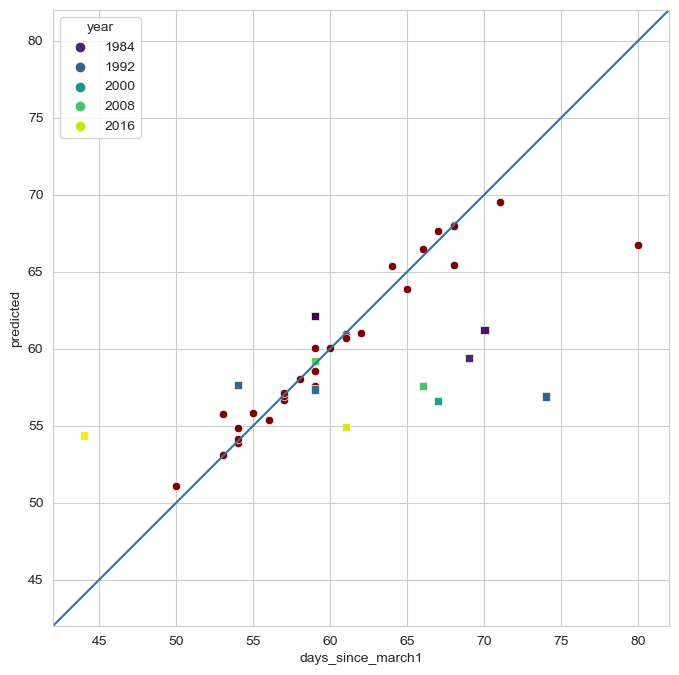

In [ ]:
random_seed = 2020
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=random_seed)

params_gb = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "quantile",
    'subsample': 0.3,
    'random_state': random_seed, 
}
model1 = GradientBoostingRegressor(**params_gb)
model2 = RandomForestRegressor(random_state=random_seed)
model2 = best_model
model3 = ExtraTreesRegressor(n_estimators=200)
# define search
model = VotingRegressor(estimators=[('gb', model1), ('rf', model2), ('lr', model3)])
model = model2
# execute search
result = model.fit(X_train, y_train)
# get the best performing model fit on the whole training set
mse = mean_squared_error(y_train, model.predict(X_train))
print("The mean squared error (MSE) on train set: {:.4f}".format(mse))
mse = mean_squared_error(y_test, model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(f"The score for this training set is {model.score(X_train, y_train):.4f}")
print(f"The validation score for this test set is {model.score(X_test, y_test):.4f}")
print(f"Pearson score on training set: {np.corrcoef(y_train.values, model.predict(X_train))[1, 0]:.4f}")
print(f"Pearson score on test set: {np.corrcoef(y_test.values, model.predict(X_test))[1, 0]:.4f}")
pred = best_model.predict(X_test)
print()

plot_df = pd.DataFrame(y_test)
plot_df.reset_index(inplace=True)
plot_df.columns = ['year', 'days_since_march1']
plot_df['predicted'] = model.predict(X_test)
plot_df_train = pd.DataFrame(y_train)
plot_df_train
plot_df_train.reset_index(inplace=True)
plot_df_train.columns = ['year', 'days_since_march1']
plot_df_train['predicted'] = model.predict(X_train)
plot_df_train
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharex=True)
# sns.lineplot(x='year', y='days_since_march1', data=plot_df_train, ax=ax[0])
# sns.scatterplot(x='year', y='predicted', data=plot_df_train, color='red', ax=ax[0])
# sns.lineplot(x='year', y='days_since_march1', data=plot_df, ax=ax[1])
# sns.scatterplot(x='year', y='predicted', data=plot_df, color='red', ax=ax[1])
sns.scatterplot(x='days_since_march1', y='predicted', data=plot_df_train, color='maroon', ax=ax)
sns.scatterplot(x='days_since_march1', y='predicted', data=plot_df, hue='year', marker='s', palette='viridis', ax=ax)
ax.set_xlim([42, 82])
ax.set_ylim([42, 82])
ax.axline([ax.get_xlim()[0], ax.get_ylim()[0]], [ax.get_xlim()[1], ax.get_ylim()[1]])
ax.set_aspect('equal')
plt.show(fig)

In [ ]:
best_model.score(X_new, y)

0.4819703937253288

In [ ]:
best_model.score(X_train, y_train)

0.6102052488908565

In [ ]:
best_model.score(X_test, y_test)

0.15798219657804646

In [ ]:
sns.set_style('whitegrid')

The mean squared error (MSE) on train set: 8.3619
The mean squared error (MSE) on test set: 81.9090
The score for this training set is 0.7550
The validation score for this test set is -0.4389
Pearson score on training set: 0.8853
Pearson score on test set: -0.4109



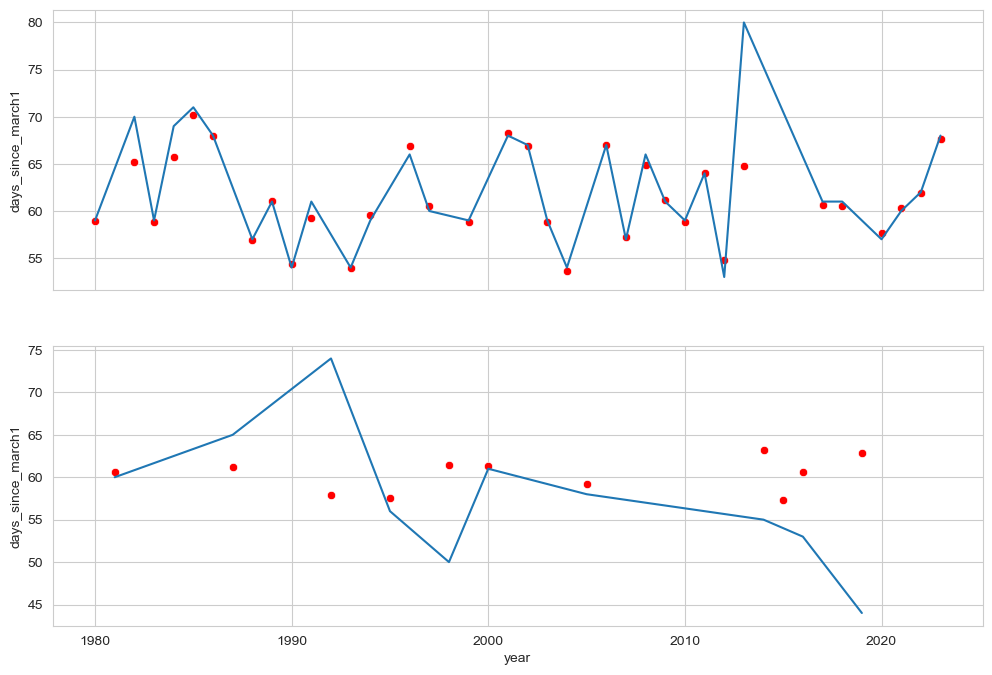

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = best_model

model.fit(X_train, y_train)
mse = mean_squared_error(y_train, model.predict(X_train))
print("The mean squared error (MSE) on train set: {:.4f}".format(mse))
mse = mean_squared_error(y_test, model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(f"The score for this training set is {model.score(X_train, y_train):.4f}")
print(f"The validation score for this test set is {model.score(X_test, y_test):.4f}")
print(f"Pearson score on training set: {np.corrcoef(y_train.values, model.predict(X_train))[1, 0]:.4f}")
print(f"Pearson score on test set: {np.corrcoef(y_test.values, model.predict(X_test))[1, 0]:.4f}")
pred = best_model.predict(X_test)
print()

plot_df = pd.DataFrame(y_test)
plot_df.reset_index(inplace=True)
plot_df.columns = ['year', 'days_since_march1']
plot_df['predicted'] = model.predict(X_test)
plot_df_train = pd.DataFrame(y_train)
plot_df_train
plot_df_train.reset_index(inplace=True)
plot_df_train.columns = ['year', 'days_since_march1']
plot_df_train['predicted'] = model.predict(X_train)
plot_df_train
fig, ax = plt.subplots(2, 1, figsize=(12,8), sharex=True)
sns.lineplot(x='year', y='days_since_march1', data=plot_df_train, ax=ax[0])
sns.scatterplot(x='year', y='predicted', data=plot_df_train, color='red', ax=ax[0])
sns.lineplot(x='year', y='days_since_march1', data=plot_df, ax=ax[1])
sns.scatterplot(x='year', y='predicted', data=plot_df, color='red', ax=ax[1])
# sns.scatterplot(x='days_since_march1', y='predicted', data=plot_df_train, color='blue', ax=ax)
# sns.scatterplot(x='days_since_march1', y='predicted', data=plot_df, color='red', ax=ax)
# ax.set_box_aspect(1)
plt.show(fig)

In [ ]:
best_model.fit(X_new, y)
prediction = best_model.predict(pd.DataFrame(X_2024[X.columns[selector.get_support()]]).T)
ru.dayssince2date(prediction.item())

datetime.date(2000, 4, 30)

In [ ]:
pd.DataFrame(X_2024[X.columns[selector.get_support()]]).T

,SOI_FM,Nino3.4_DJ,Nino3.4_FM,NAO_FM,SCA_FM,POL_DJ,NenanaIceThick,t2m
2024,-0.85,1.925,1.34,0.79,-0.55,-0.91,49.0,16.016


In [ ]:
X_train

,AO_DJ,AO_FM,SOI_FM,Nino3.4_DJ,Nino3.4_FM,NAO_FM,EA_FM,EA-WR_DJ,SCA_FM,POL_DJ,seaice_chuk_anom_FM,NenanaIceThick,t2m
2002,0.029,1.103,0.70,-0.280,-0.015,0.560,1.030,1.150,-1.000,-0.075,-372.565,48.000000,8.885
1981,-0.087,-0.989,-1.20,-0.155,-0.640,-0.525,0.315,-0.755,-0.140,0.990,-6019.920,39.755556,22.897
2016,-0.003,0.128,-1.65,2.615,1.940,0.860,1.280,0.510,-0.385,-1.865,7566.822,36.000000,18.314
2022,0.523,0.924,2.35,-1.000,-0.930,0.930,0.835,-0.020,-0.555,-0.775,9180.493,31.250000,13.233
2006,-1.137,-0.880,1.55,-0.915,-0.690,-1.385,-0.635,1.065,-0.270,-0.660,8721.135,32.700000,2.939
1984,0.545,-1.345,0.50,-0.850,-0.355,-0.210,-0.620,-1.000,1.385,-0.150,-29958.123,39.755556,17.635
1994,-0.196,0.510,-0.35,0.130,0.085,0.500,0.765,0.070,0.265,0.440,-28610.383,51.000000,9.237
1995,0.370,0.911,0.50,1.135,0.595,0.880,-0.715,-0.210,-1.200,0.695,14189.657,34.000000,4.348
1997,-1.089,1.490,1.10,-0.585,-0.310,1.305,0.665,0.970,-1.100,1.840,11526.840,42.500000,3.664
1991,1.000,-0.702,-0.35,0.420,0.175,0.065,0.425,1.460,1.320,0.550,7629.881,38.000000,12.811
